## 1. Connexion à la base de données

In [1]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501


## 2. Standardisation des salaires

In [2]:
import re

# Function to parse and standardize salary
def standardize_salary(salary):
    if salary is None:
        return None
    
    # Find all numbers in the salary string
    numbers = [float(num.replace('K', '000')) for num in re.findall(r'[\d.]+K?|[\d,]+', salary.replace(',', ''))]
    
    # Determine the salary period and calculate annual salary
    if 'a month' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 12) # Average if a range, then convert to annual
    elif 'a day' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 220)  # Average if a range, then convert to annual
    elif 'a year' in salary:
        annual_salary = int(sum(numbers) / len(numbers))  # Average if a range
    else:
        annual_salary = None  # Undefined period
    
    return annual_salary

# Apply the function to each salary
df['salary_standardized'] = [standardize_salary(s) for s in df.salary]
df

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,salary_standardized
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT,NaN
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501,NaN
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501,NaN
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501,NaN
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,Stage - Data Analyst Achats,COLAS SA,Votre mission Au sein du Pôle Achats Equipemen...,"Alfortville, France",via Talent.com,"{""7 days ago"",""Full-time and Internship"",""7 da...",Full-time and Internship,None,7 days ago,None,None,2024-03-29 17:22:30.515702,NaN
6470,Stage - Data Analyst Achats,COLAS SA,Votre mission Au sein du Pôle Achats Equipemen...,"Maisons-Alfort, France",via Talent.com,"{""7 days ago"",""Full-time and Internship"",""7 da...",Full-time and Internship,None,7 days ago,None,None,2024-03-29 17:22:30.515702,NaN
6471,Data Integration Analyst - Hybrid or Remote fr...,Wakam,Wakam is an insurer that designs tailor-made w...,"Malakoff, France",via Talent.com,"{""7 days ago"",""€32 an hour"",Full-time,""7 days ...",Full-time,None,7 days ago,None,None,2024-03-29 17:22:30.515702,NaN
6472,Stage - Data Analyst Achat H/F,COLAS SA,Votre mission Et si vous rejoigniez une entrep...,"Chevilly Larue, France",via Talent.com,"{""7 days ago"",""Full-time and Internship"",""7 da...",Full-time and Internship,None,7 days ago,None,None,2024-03-29 17:22:30.515702,NaN


## 3. EDA sur les salaires

In [3]:
# Descriptive statistics
desc_stats = df['salary_standardized'].describe()
desc_stats

count       521.000000
mean      50718.472169
std       37533.571763
min          15.000000
25%       13463.000000
50%       47500.000000
75%       80500.000000
max      159500.000000
Name: salary_standardized, dtype: float64

## Salaire Médian

In [4]:
median_salary = df['salary_standardized'].median()
median_salary


47500.0

## Salaire median sur la durée

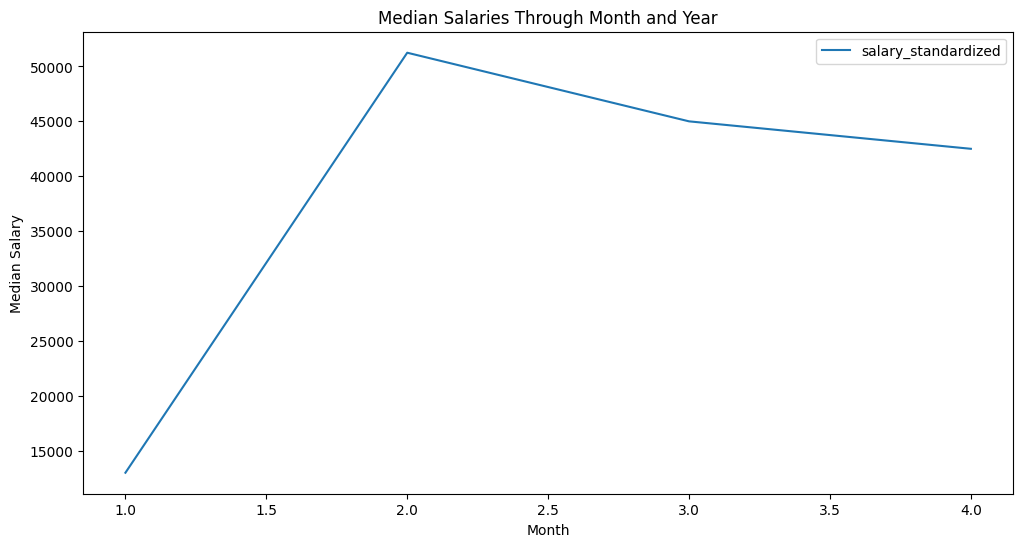

In [5]:
df['month'] = df['posted_at_timestamp'].dt.month
df['year'] = df['posted_at_timestamp'].dt.year
# Group by 'month' and 'year' and calculate the median salary
df_grouped = df.groupby(['month', 'year']).agg({'salary_standardized': 'median'})
df_grouped = df_grouped.reset_index()

# Plot the median salaries through month and year
df_grouped.plot(x='month', y='salary_standardized', kind='line', figsize=(12, 6))
plt.title('Median Salaries Through Month and Year')
plt.xlabel('Month')
plt.ylabel('Median Salary (€)')
plt.show()

## Graphs sur les salaires

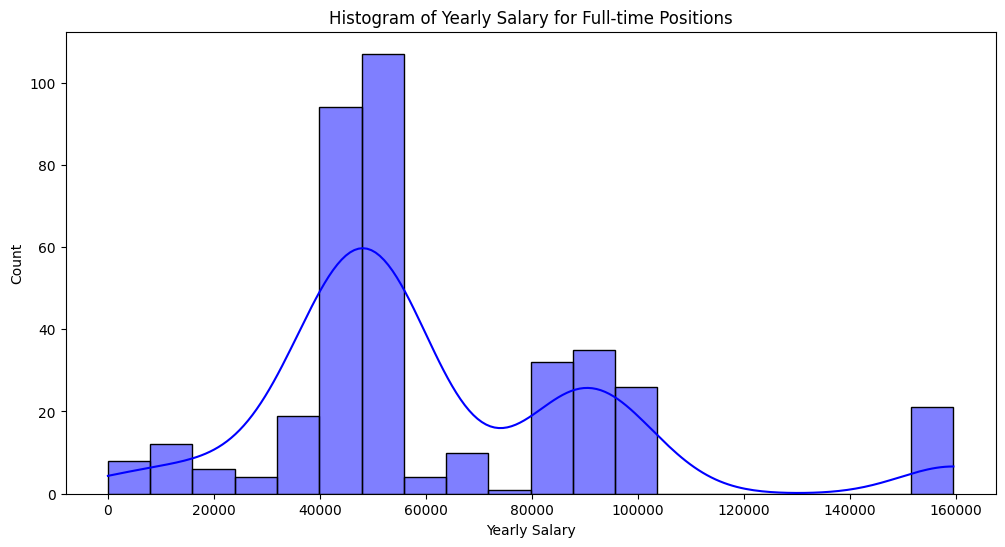

In [6]:
df_salary = df[df['salary_standardized'].notnull()]
# Filter rows where 'employment_type' contains 'Full-time'
df_filtered = df_salary[df_salary['employment_type'].str.contains('Full-time', case=False, na=False)]

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['salary_standardized'], kde=True, bins=20, color='blue')
plt.title('Histogram of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary (€)')
plt.show()

## Histogram Observations

- The histogram confirms the salary distribution is not normal with multiple modes.
- Most salaries are concentrated around the $40,000 to €80,000 range.
- There's a smaller peak around €120,000, suggesting a smaller group of high-paying jobs.

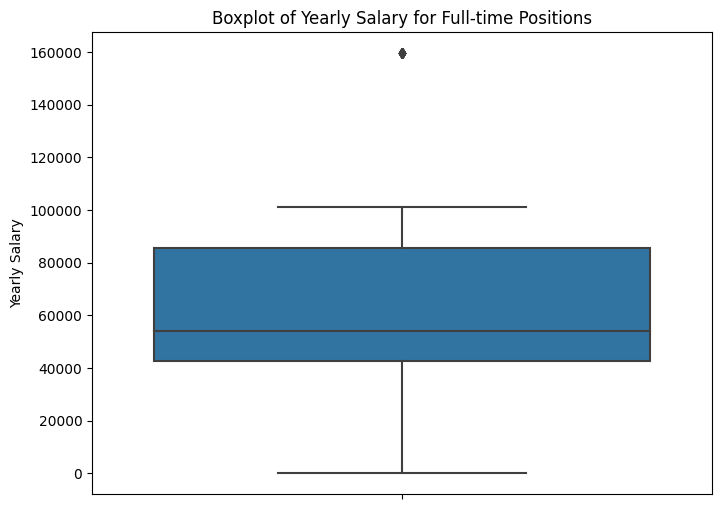

In [7]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='salary_standardized')
plt.title('Boxplot of Yearly Salary for Full-time Positions')
plt.ylabel('Yearly Salary (€)')
plt.show()


## Boxplot Observations

- The median salary is around €52,500, with a large interquartile range (IQR).
- Salaries range from below €20,000 to over €100,000, indicating a wide disparity.
- Outliers are present above €140,000, suggesting a few positions offer significantly higher pay.

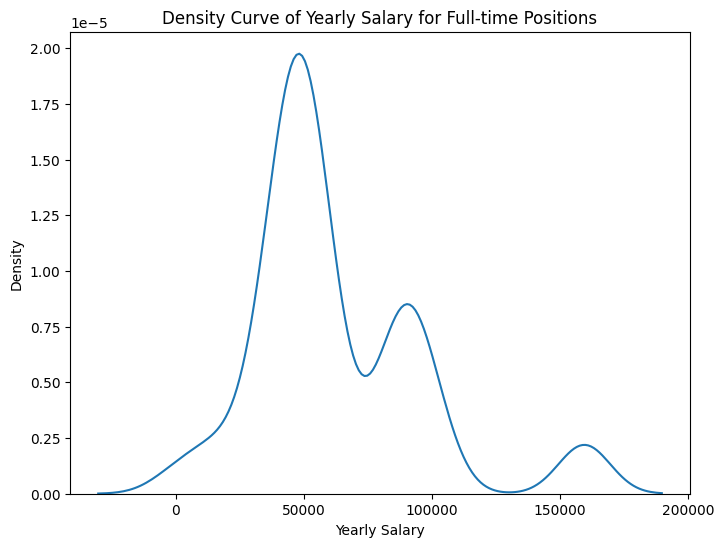

In [8]:
# Density curve
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_filtered, x='salary_standardized')
plt.title('Density Curve of Yearly Salary for Full-time Positions')
plt.xlabel('Yearly Salary (€)')
plt.ylabel('Density')
plt.show()


## Density Curve Observations

- The curve shows multiple peaks, indicating the presence of different groups or levels within the salary distribution.
- The highest peak is around the $40,000 to $60,000 range, which may represent the most common salary bracket.
- The distribution is not symmetrical, indicating variability in how salaries are spread out across the dataset.

In [9]:
# Group by 'employment_type' and calculate the mean and median salary
df_grouped = df_filtered.groupby('employment_type').agg({'salary_standardized': ['mean', 'median']})
df_grouped.columns = ['mean_salary', 'median_salary']
df_grouped = df_grouped.reset_index()
df_grouped

,employment_type,mean_salary,median_salary
0,Full-time,61545.332308,52500.0
1,Full-time and Contractor,26143.333333,38589.0
2,Full-time and Internship,26491.666667,13463.0
3,Full-time and Temp work,75030.555556,85375.0


## Employment Type Table Observations

- Full-time positions have a high mean salary of €61,545.33, but the median is lower at €52,500, indicating a skew in the distribution due to high earners.
- Full-time and Contractor roles have a substantially lower mean salary of €26,143.33 but a much higher median of $38,589, suggesting extreme values influencing the mean.
- Temp Work have a way higher mean and median salaries, further analysis are required.

## Overall Insights

- There's significant variation in full-time salaries, with a notable number of high-paying outliers.
- The most common salaries for full-time positions are modest compared to the mean salary, which is skewed by high earners.
- The variance between mean and median salaries for contractors implies that a few earn substantially more than the rest.
- Internships and temp work are anormally higher paid, Further research is required.